In [20]:
from dolfin import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

# Deform mesh with linear transform

The first set of example illustrates how to transform a UnitSquareMesh (created here by using RectangleMesh) to three different meshes. The key idea is to interpret the mesh as a continum body and apply the transformation matrix $\mathbf{T}$ so that it deforms into another shape. Assume that $\mathbf{T}$ is a transformation matrix with $\det(\mathbf{T}) > 0$), then $\mathbf{T}$ can be decomposed as $\mathbf{T} = \mathbf{R}\mathbf{U}$, where $\mathbf{R} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$ is the rotation matrix and $\mathbf{U} = \mathbf{U}^{T}$ is the right stretch tensor. 

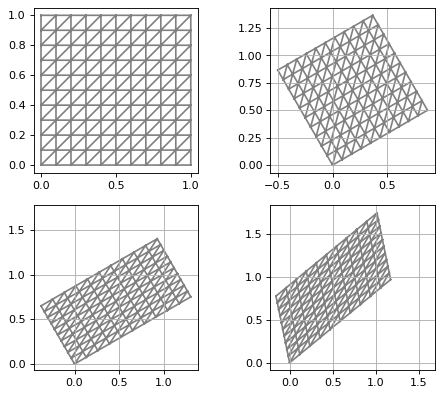

In [27]:
# The first example transform a rectangle mesh to a parallelogram mesh
nx, ny = (10, 10)
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)
mesh_1 = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)
mesh_2 = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)
mesh_3 = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)
# x = mesh.coordinates()[:, 0]   # x-coordinates of nodes
# y = mesh.coordinates()[:, 1]   # y-coordinates

theta = np.pi/6
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta),  np.cos(theta)]])    # rotation matrix
U_1 = np.array([[1, 0], [0, 1]])     # stretching matrix
U_2 = np.array([[1.5, 0], [0, 3/4]])
U_3 = np.array([[1.5, 0.25], [0.25, 3/4]])
mesh_1.coordinates()[:] = np.dot(np.dot(R, U_1), mesh.coordinates().T).T
mesh_2.coordinates()[:] = np.dot(np.dot(R, U_2), mesh.coordinates().T).T
mesh_3.coordinates()[:] = np.dot(np.dot(R, U_3), mesh.coordinates().T).T

plt.figure(figsize=(7,6), dpi = 80)
plt.subplot(2,2,1); plt.axis("square"); plot(mesh)
plt.subplot(2,2,2); plot(mesh_1); plt.axis("square"); plt.grid();
plt.subplot(2,2,3); plot(mesh_2); plt.axis("square"); plt.grid(); 
plt.subplot(2,2,4); plot(mesh_3); plt.axis("square"); plt.grid(); 

# Deform mesh with nonlinear transformation

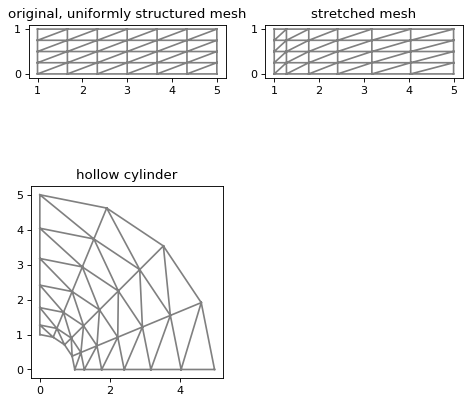

In [45]:
Theta = 0.5 * np.pi
a, b = 1, 5.0
nr = 6  # divisions in r direction
nt = 4  # divisions in theta direction
mesh = RectangleMesh(Point(a, 0), Point(b, 1), nr, nt)
plt.figure(figsize=(7, 7), dpi=80)
plt.subplot(2,2,1)
plot(mesh, title="original, uniformly structured mesh")
plt.axis([a-0.2, b+0.2, -0.1, 1.1])
# First make a denser mesh towards r=a
x = mesh.coordinates()[:,0]
y = mesh.coordinates()[:,1]
s = 1.5

def denser(x, y):
    return [a + (b-a)*((x-a)/(b-a))**s, y]

x_bar, y_bar = denser(x, y)
xy_bar_coor = np.array([x_bar, y_bar]).transpose()
mesh.coordinates()[:] = xy_bar_coor
plt.subplot(2,2,2); 
plot(mesh, title='stretched mesh')
plt.axis([a-0.2, b+0.2, -0.1, 1.1])


def cylinder(r, s):
    return [r*np.cos(Theta*s), r*np.sin(Theta*s)]

x_hat, y_hat = cylinder(x_bar, y_bar)
xy_hat_coor = np.array([x_hat, y_hat]).transpose()
mesh.coordinates()[:] = xy_hat_coor
plt.subplot(2,2,3)
plot(mesh, title='hollow cylinder')

# RVE with circular inclusion

First, we create a unit square domain with a circular inclusion as subdomain.  and create a mesh on such subdomains.

In [102]:
domain = Rectangle(Point(0, 0), Point(1, 1))
inclusion = Circle(Point(0.5, 0.5), 0.2)
domain.set_subdomain(1, inclusion)
mesh = generate_mesh(domain, 12)
subdomain_marker = MeshFunction('size_t', mesh, mesh.topology().dim(),
                               mesh.domains())

U = np.array([[1, 0.25], [0.25, 1.0]])
mesh_1 = Mesh(mesh)
mesh_1.coordinates()[:] = np.dot(U, mesh.coordinates().T).T
mesh_1.domains = mesh.domains
subdomain_marker_1 = MeshFunction('size_t', mesh_1, mesh_1.topology().dim(),
                                 mesh_1.domains())

In [107]:
mesh_1_domains = mesh_1.domains()

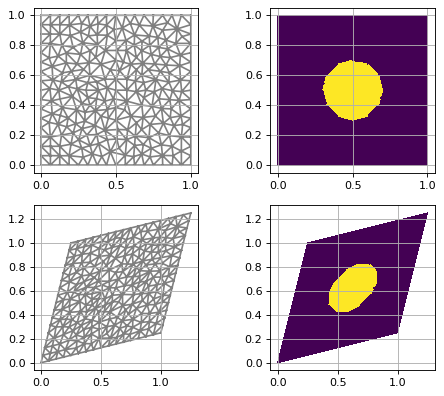

In [103]:
plt.figure(figsize=(7, 6), dpi=80)
plt.subplot(2,2,1)
plot(mesh); plt.grid()
plt.subplot(2,2,2)
plot(subdomain_marker); plt.grid()
plt.subplot(2,2,3)
plot(mesh_1); plt.grid()
plt.subplot(2,2,4)
plot(subdomain_marker_1); plt.grid()

In [104]:
# Simple check to see if the nodes on the boundaries are symmetric (periodic)

x = mesh.coordinates()[:,0]
y = mesh.coordinates()[:,1]
y_right_sorted = np.sort(y[np.argwhere(abs(x - 1.0) < 1E-10)].ravel())
y_left_sorted = np.sort(y[np.argwhere(abs(x - 0.0) < 1E-10)].ravel())

print("Nodes on the left and on the right boundaries are symmetric: ", 
      np.allclose(y_right_sorted, y_left_sorted))

x_bottom_sorted = np.sort(x[np.argwhere(abs(y) < 1E-10)].ravel())
x_upper_sorted = np.sort(x[np.argwhere(abs(y - 1.0) < 1E-10)].ravel())

print("Nodes on the bottom and on the upper boundaries are symmetric: ", 
      np.allclose(x_bottom_sorted, x_upper_sorted))

Nodes on the left and on the right boundaries are symmetric:  True
Nodes on the bottom and on the upper boundaries are symmetric:  True
